Tahap 1 : Pemilihan Dataset dan Eksplorasi Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


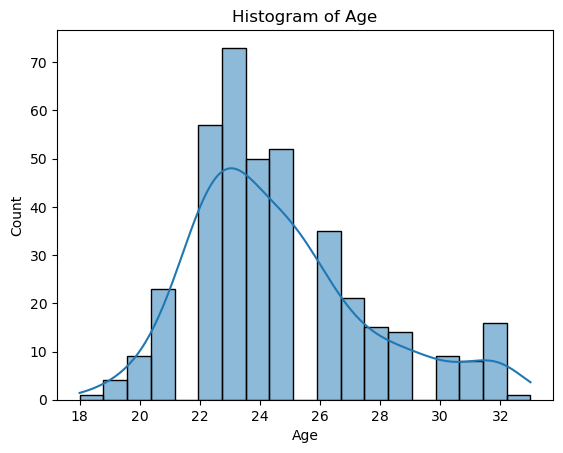

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


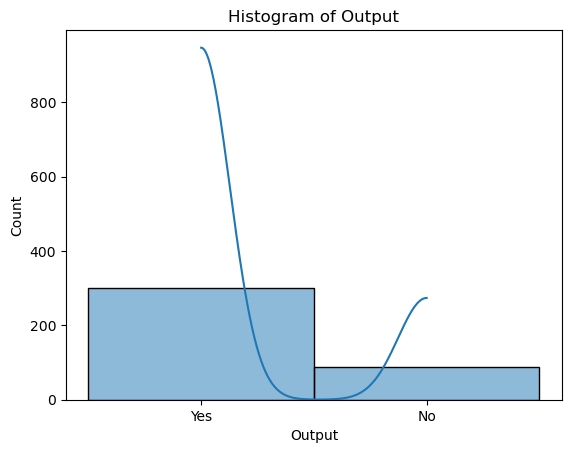

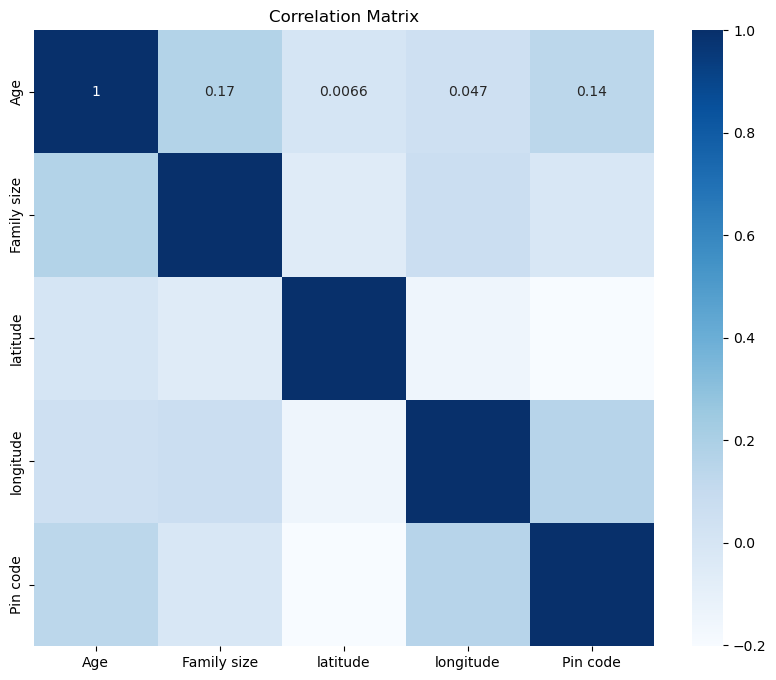

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Memasukkan dataset
df = pd.read_csv('onlinefoods.csv')

# Menampilkan informasi dasar tentang dataset
print(df.info())
print(df.describe())

# Mengecek Data Missing
print(df.isnull().sum())

# Histogram dari variabel 'Age'
sns.histplot(df['Age'], kde=True)
plt.title('Histogram of Age')
plt.show()

# Histogram dari 'Output'
sns.histplot(df['Output'], kde=True)
plt.title('Histogram of Output')
plt.show()

# Pilih hanya kolom numerik untuk matriks korelasi
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='Blues')  # Using the 'Blues' colormap for light to dark blue
plt.title('Correlation Matrix')
plt.show()

Tahap 2 : Pra-pemrosesan Data

In [3]:
# Menangani nilai-nilai yang hilang
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Mengkodekan variabel kategori
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Membagi dataset menjadi set pelatihan dan set pengujian
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menerapkan pra-pemrosesan
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Tahap 3 : Training Model Dan Comparasi Data

In [4]:
# Mendefinisikan model-model
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Melatih dan mengevaluasi model-model menggunakan validasi silang
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f'{name} Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})')

SVM Cross-Validation Accuracy: 0.87 (+/- 0.04)
KNN Cross-Validation Accuracy: 0.82 (+/- 0.05)
Random Forest Cross-Validation Accuracy: 0.91 (+/- 0.03)


Tahap 4 : Pemilihan dan Penerapan Model

In [5]:
# Melatih model terbaik (dengan mengasumsikan Random Forest sebagai model terbaik berdasarkan hasil sebelumnya)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)